#  Setup Environment

In [25]:
# download the pytesseract library and other necessary libraries
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow


Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 582 kB/8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Fetched 582 kB in 5s (127 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a c

**Explanations:**

Pytesseract is an OCR (Optical Character Recognition) library for Python that can recognize text in images and convert them into editable data. This tool is based on Google's Tesseract OCR engine and allows developers to easily integrate text recognition capabilities in Python projects.

import cv2: Import OpenCV library for image processing.

import numpy as np: Import NumPy library for array operations.

from matplotlib import pyplot as plt: Import Matplotlib library for image display.

import pytesseract: Import Tesseract library for text extraction.

# Load an Image (Insert Your Image Path Here)

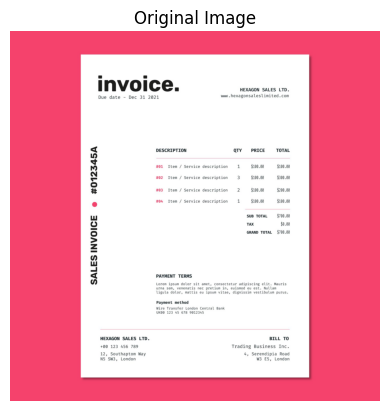

In [70]:
image_path = '/5451880.jpg'  # You can replace the path with your own file path
image = cv2.imread(image_path)

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

**Explanations:**

image_path = 'image_path': specifies the path of the image.

image = cv2.imread(image_path): uses OpenCV to load the image.

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)): uses Matplotlib to display the image. The image loaded by OpenCV is in BGR format and needs to be converted to RGB format.

plt.title('Original Image'): sets the image title as 'Original Image'.

plt.axis('off'): Hides the axis. You can also change 'off' to 'on' to display the axis.

# Pre-process the Image

In [71]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noice
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Apply Canny edge detection method
edges = cv2.Canny(binary, 50, 150, 3, L2gradient=True)

**Explanations:**

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY): Converts the image to grayscale.

blurred = cv2.GaussianBlur(gray, (5, 5), 0): blurred_image = cv2.

cv2.GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=cv2.BORDER_DEFAULT)

Where (5, 5) is the **kernel**;

0 is the **standard deviation in the X direction**. If 0, it is calculated from the kernel size;

**sigmaY (optional)**: standard deviation in the Y direction. If None or 0, it is the same as sigmaX;

**borderType (optional)**: border mode, specifies how to handle borders. The default value is cv2.BORDER_DEFAULT.

binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU):

cv2.threshold(src, thresh, maxval, type);

**thresh**: Threshold value used to classify pixel values ​​into two categories;

**maxval**: Maximum value assigned to a pixel when its value is greater than (or less than, depending on the type) the threshold.

**type**: Specifies the threshold type. Common types include:

cv2.THRESH_BINARY: **Sets pixels with values ​​greater than the threshold to maxval, otherwise to 0.**

cv2.THRESH_BINARY_INV: Sets pixels with values ​​greater than the threshold to 0, otherwise to maxval.

cv2.THRESH_TRUNC: Sets pixels with values ​​greater than the threshold to the threshold, and the rest remain unchanged.

cv2.THRESH_TOZERO: Sets pixels with values ​​greater than the threshold to remain unchanged, otherwise to 0.

cv2.THRESH_TOZERO_INV: Sets pixels with values ​​greater than the threshold to 0, and the rest remain unchanged.

cv2.THRESH_OTSU: **Automatically determine the optimal threshold** (use in combination with the above types, e.g. cv2.THRESH_BINARY + cv2.THRESH_OTSU).

edges = cv2.Canny(gray, 100, 200, 3):

edges = cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)

**threshold1**: The first threshold, used for hysteresis threshold processing in edge detection.

**threshold2**: The second threshold, pixels above this value are considered to be edges; pixels below threshold1 are considered not to be edges; pixels between the two thresholds are determined based on whether the neighborhood contains edge pixels.

**apertureSize** (optional, default value is 3): The size of the Sobel operator, used to calculate the image gradient. Common values ​​are 3, 5, and 7.

**L2gradient** (optional, default value is False): If True, the more accurate L2 norm will be used for gradient calculation.

# Draw bouding boxes around detected text areas

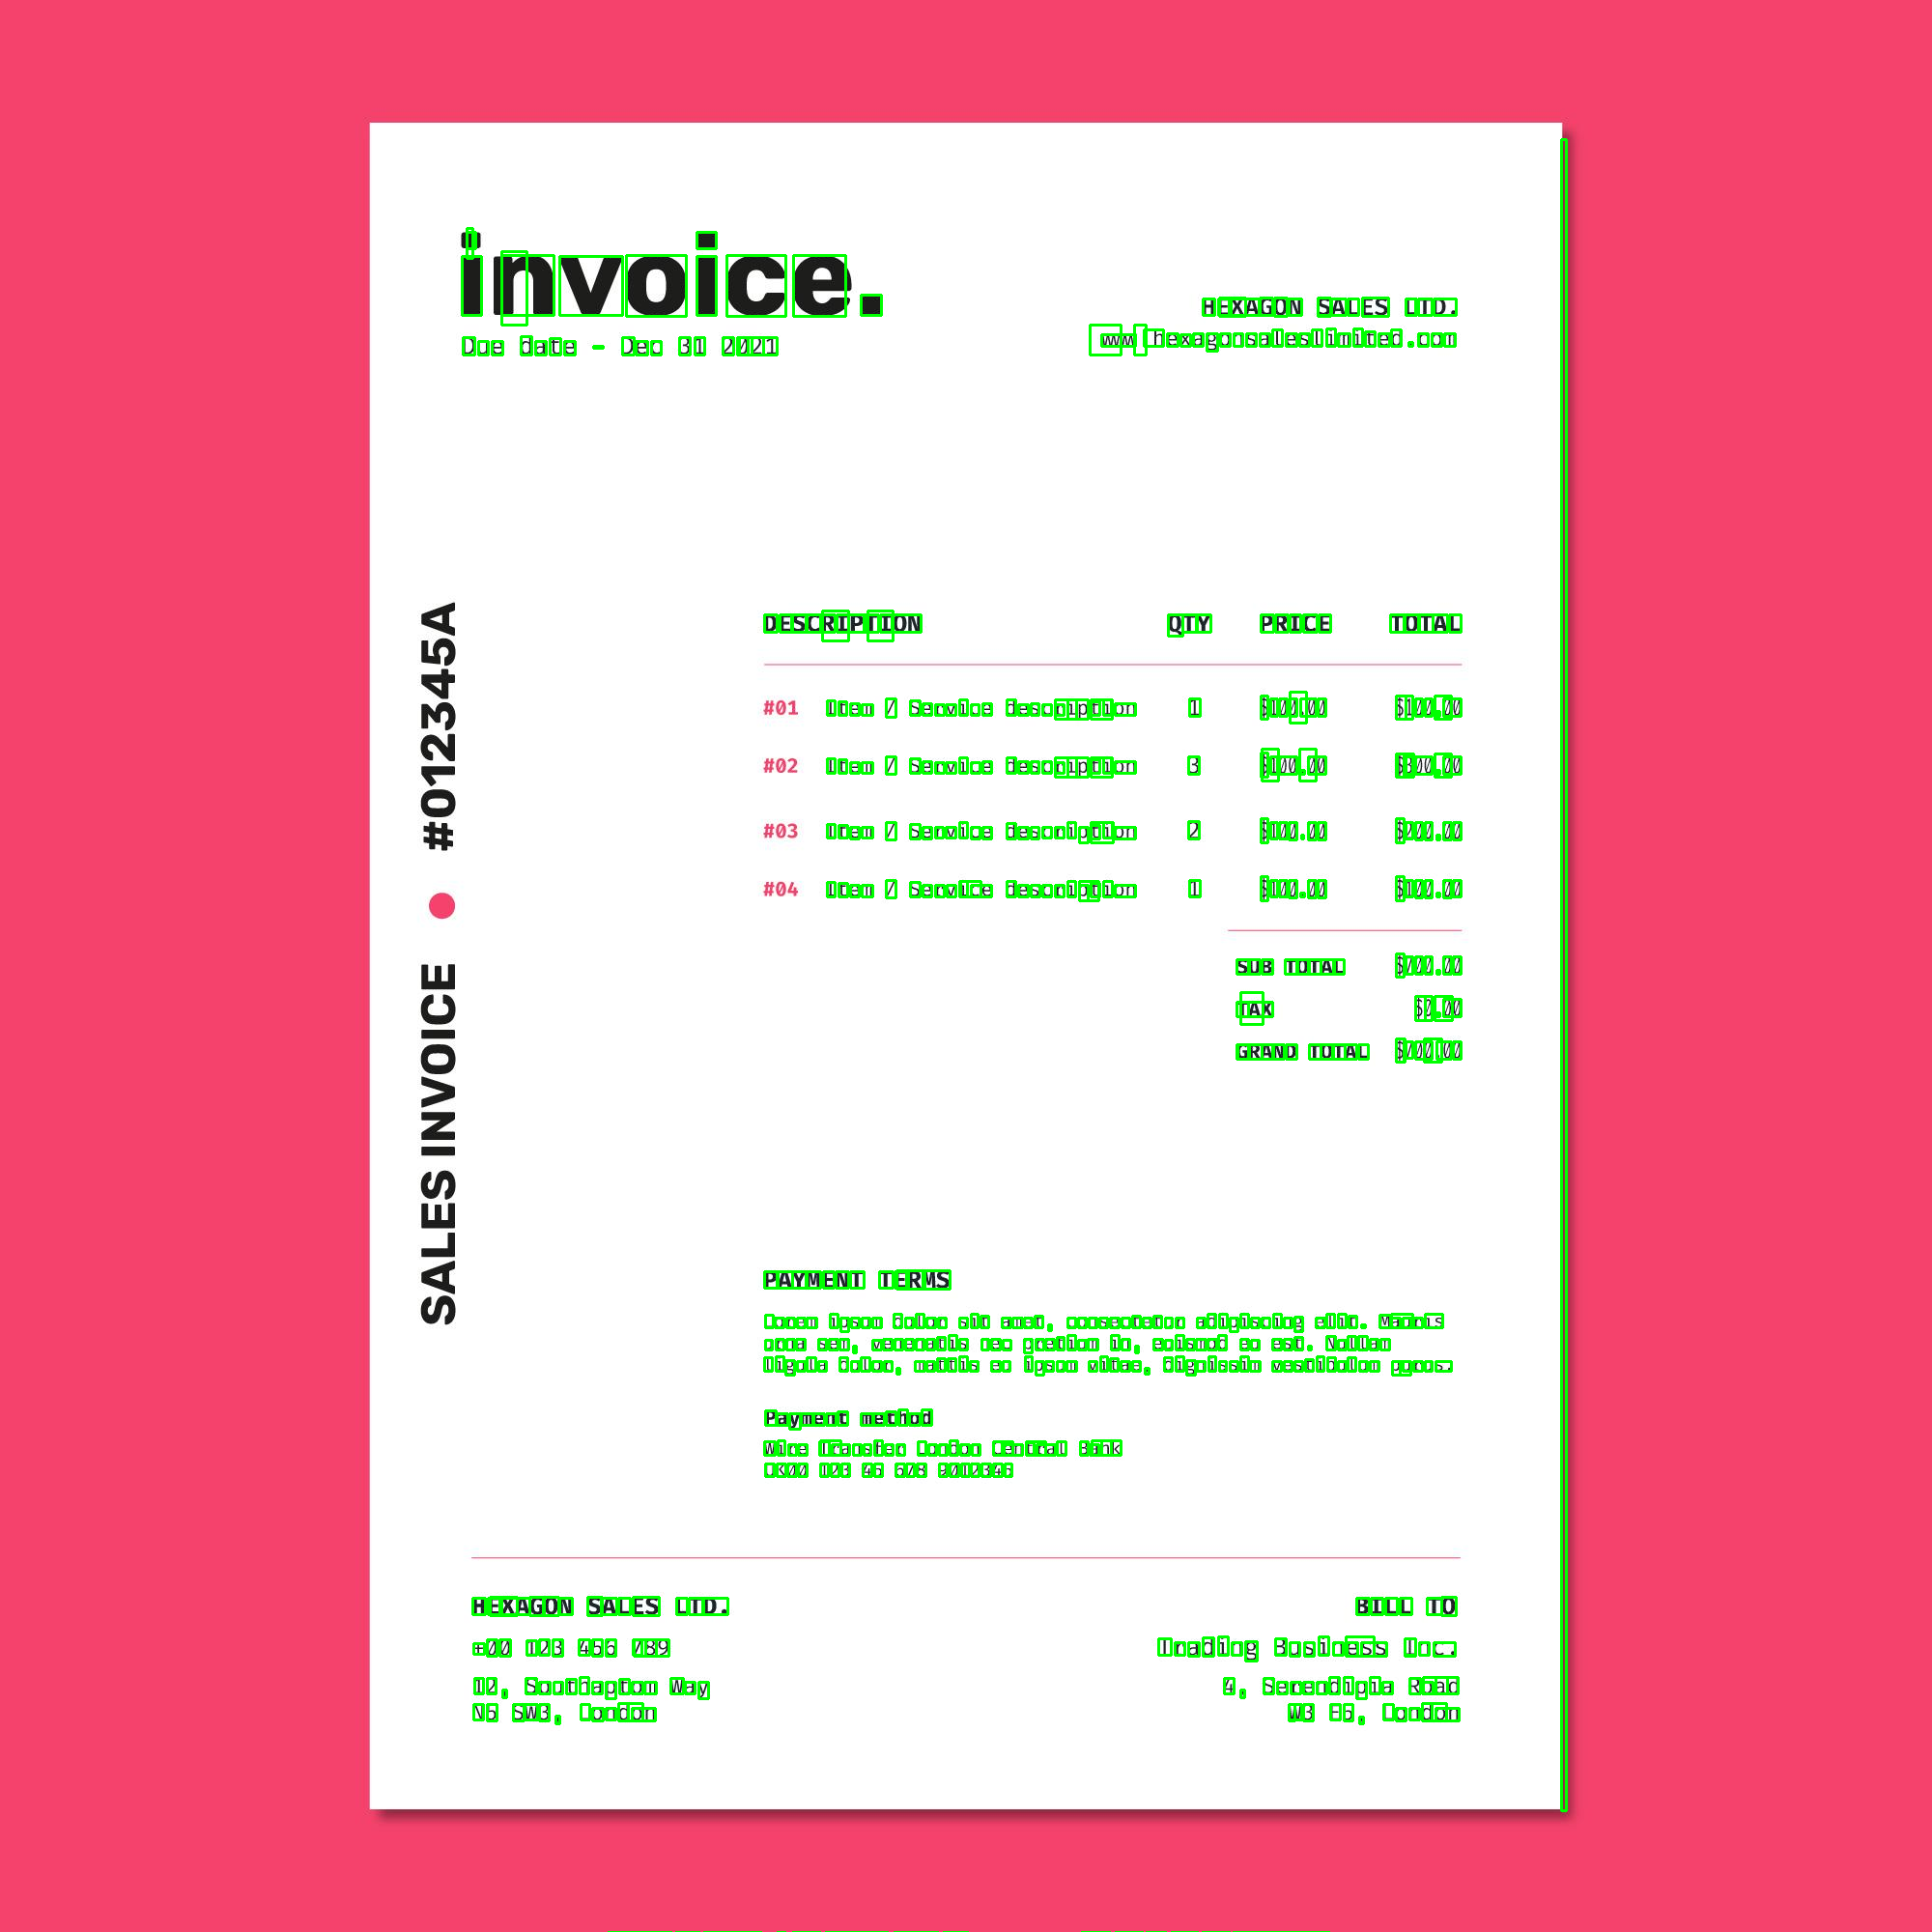

In [28]:
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b = b.split(' ')
    image_box = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
cv2_imshow(image_box)

**h, w, c = img.shape**

This line of code gets the height (h), width (w), and number of channels (c) of the image. **img.shape returns a tuple containing three values**, representing the height, width, and number of channels of the image.

**boxes = pytesseract.image_to_boxes(img)**

This line of code uses the image_to_boxes method of Tesseract OCR to detect text boxes in the image and stores its results in the variable ‘boxes’. **boxes is a string** with **each line** **representing a detected character and its bounding box information.**

**b.split(' ') splits each line into a list by space.**

**(int(b[1]), int(b[2]))**; **((int(b[3]), int(b[4]))** represent the coordinates of the lower left corner and upper right corner of the bounding box respectively.

**cv2.rectangle** draws a green ((0, 255, 0)) rectangular box with a thickness of 2 on the image img.


# Text Detection

Ss B
invoice. weenoe 38128 LM,

Due date - Dec 31 2021 ww .hexagonsaleslimited.com

DESCRIPTION PRICE TOTAL

Item / Service description $100.00 $100.00

Item / Service description $100.00 $300.00

Item / Service description $100.00 $200.00

Item / Service description $100.00 $100.00

SUB TOTAL $700.00
TAX $0.00
GRAND TOTAL $700.00

PAYMENT TERMS

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris
urna sem, venenatis nec pretium in, euismod eu est. Nullam
ligula dolor, mattis eu ipsum vitae, dignissim vestibulum purus.

<
uw)
wt
)
N
=
©
=
@
Lu
2
oO
=
=
”
Lu
|
<
”

Payment method

Wire Transfer London Central Bank
UKOO 123 45 678 9012345

 

HEXAGON SALES LTD. BILL TO
+00 123 456 789 Trading Business Inc.

12, Southaptom Way 4, Serendipia Road
N5 SW3, London w3 E5, London

 



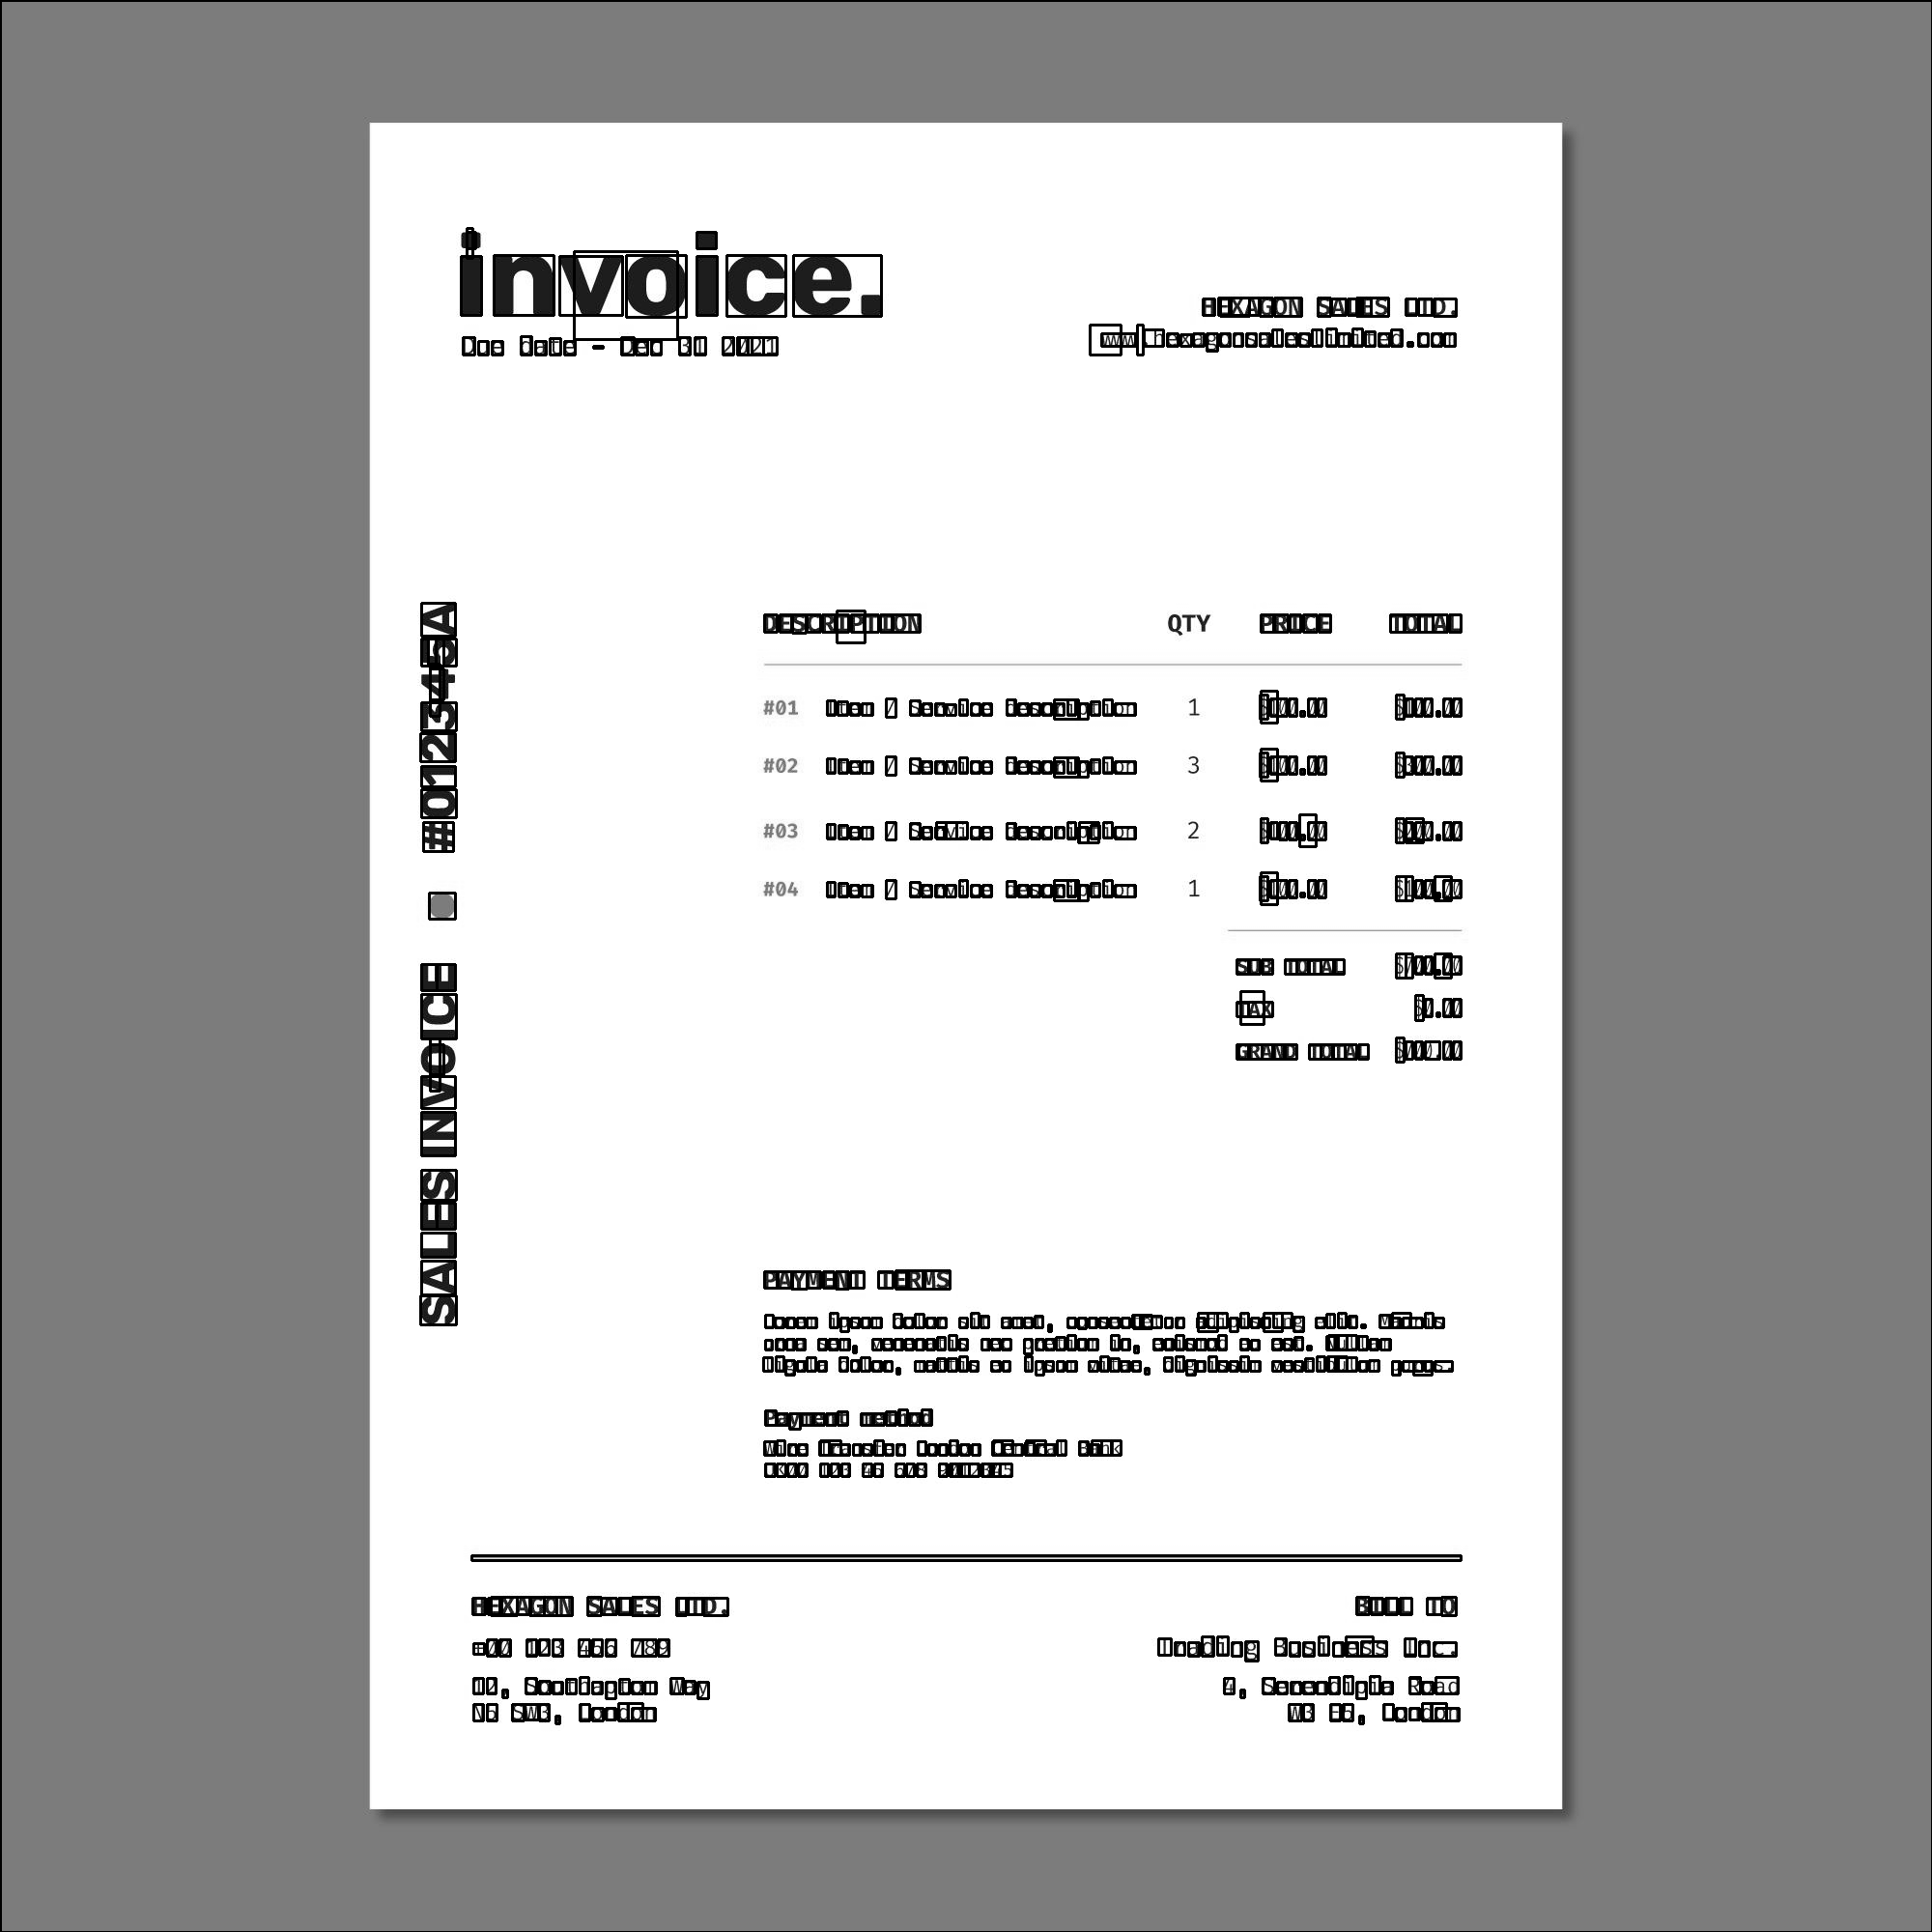

In [72]:
img = gray
# Adding custom options
custom_config = r'--oem 3 --psm 3'
text = pytesseract.image_to_string(img, config=custom_config)
lines = text.splitlines()
for line in lines:
       print(line)
# Draw bounding boxes around detected text areas
h, w = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
cv2_imshow(img)

a a
invoice. HEXAGON SALES LTD.

Due date - Dec 31 2021 ww .hexagonsaleslimited.com

DESCRIPTION TOTAL

/ Service description $100.00

/ Service description $300.00

/ Service description $200.00

/ Service description $100.00

$700.00
$0.00
$700.00

PAYMENT TERMS

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris
urna sem, venenatis nec pretium in, euismod eu est. Nullam
ligula dolor, mattis eu ipsum vitae, dignissim vestibulum purus.

<i
m7
t
N)
N
Ee
°o
J
®
Ww
2
o
=>
é
”
Ww
J
<
”

Payment method

Wire Transfer London Central Bank
UK@® 123 45 678 9012345

HEXAGON SALES LTD. BILL TO
+00 123 456 789 Trading Business Inc.

12, Southaptom Way 4, Serendipia Road
N5 SW3, London W3 E5, London

 



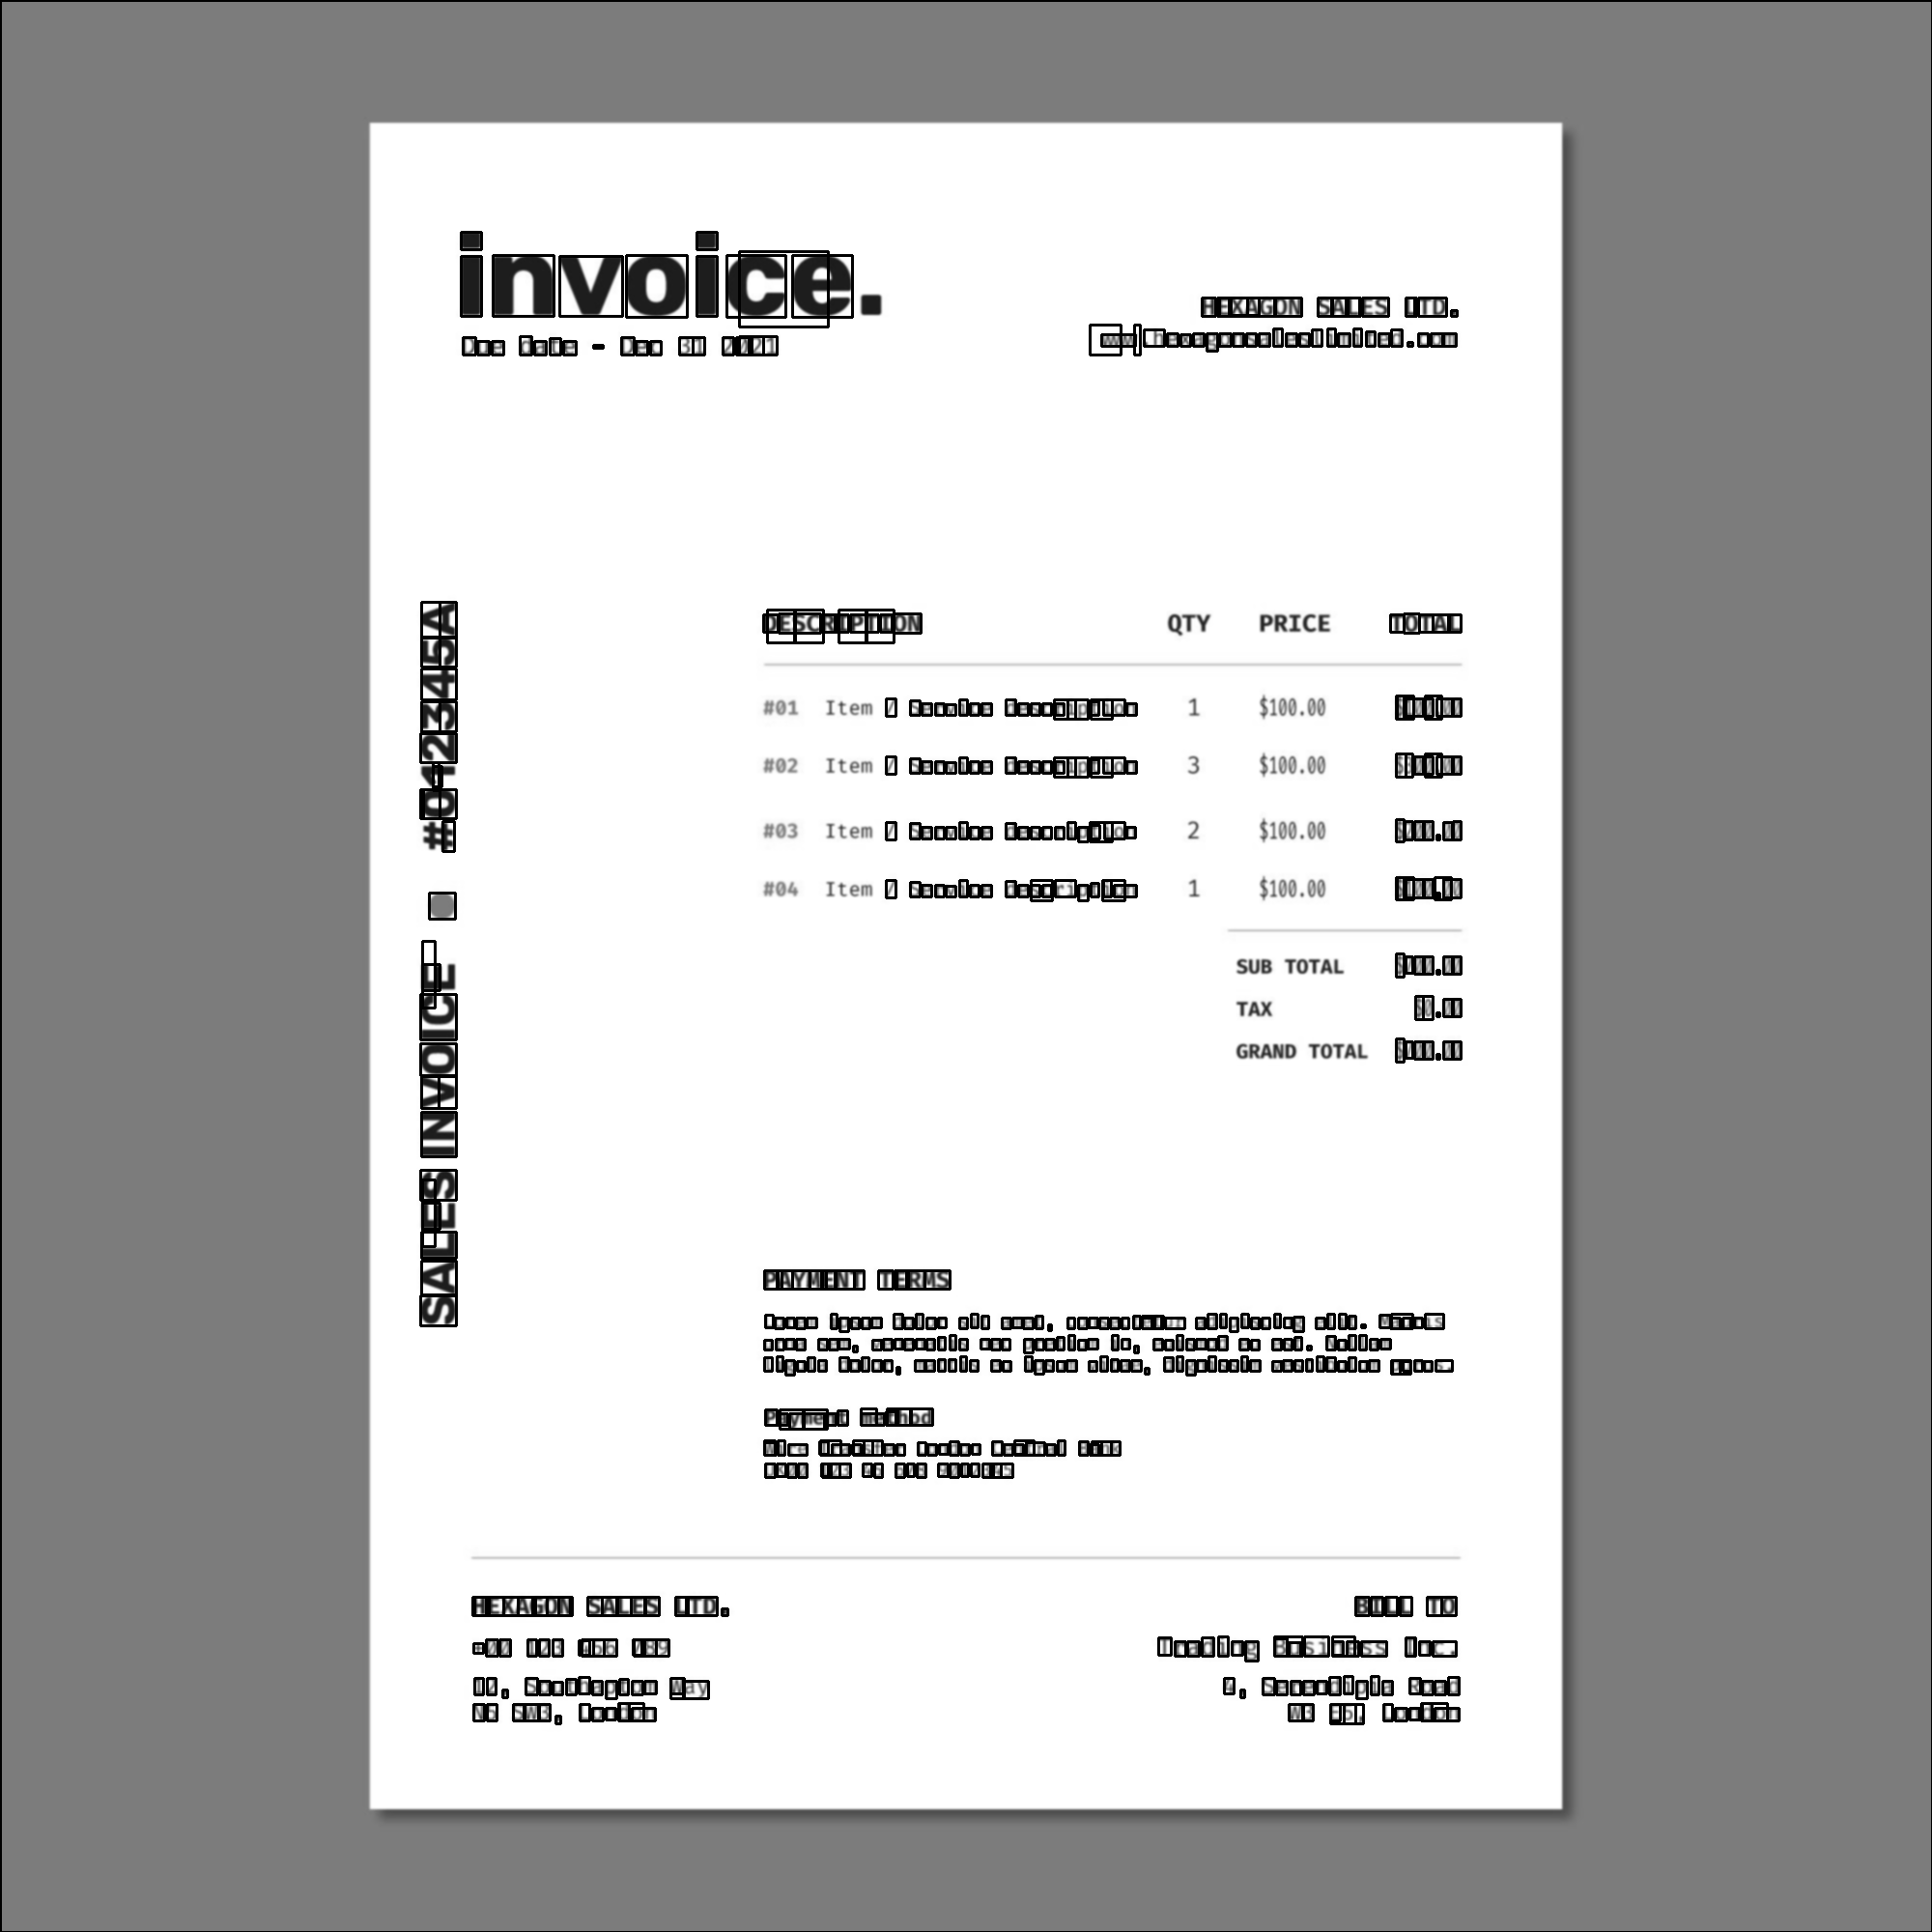

In [73]:
img = blurred
# Adding custom options
custom_config = r'--oem 3 --psm 3'
text = pytesseract.image_to_string(img, config=custom_config)
lines = text.splitlines()
for line in lines:
       print(line)
# Draw bounding boxes around detected text areas
h, w = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
cv2_imshow(img)

a a
invoice. ncxacen saues U7.

Due date - Dec 31 2021 ww .hexagonsaleslLimited.com

DESCRIPTION PRICE TOTAL

Item / Service description $100.00 $100.00

Item / Service description $100.00 $300.00

Item / Service description $100.00 $200.00

Item / Service description $100.00 $100.00

SUB TOTAL $700.00
TAK $0.00
GRAND TOTAL $700.00

PAYMENT TERMS

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris
urna sem, venenatis nec pretium in, euismod eu est. Nullam
ligula dolor, mattis eu ipsum vitae, dignissim vestibulum purus.

<
>
wt
™)
N
=
o
#
e
Lu
2
oO
>
<
”
uu
|
<
”

Payment method

Wire Transfer London Central Bank
UK@@ 123 45 678 9012345

 

HEXAGON SALES LTD. BILL TO
+00 123 456 789 Trading Business Inc.

12, Southaptom Way 4, Serendipia Road
N5 Sw3, London W3 £5, London

 



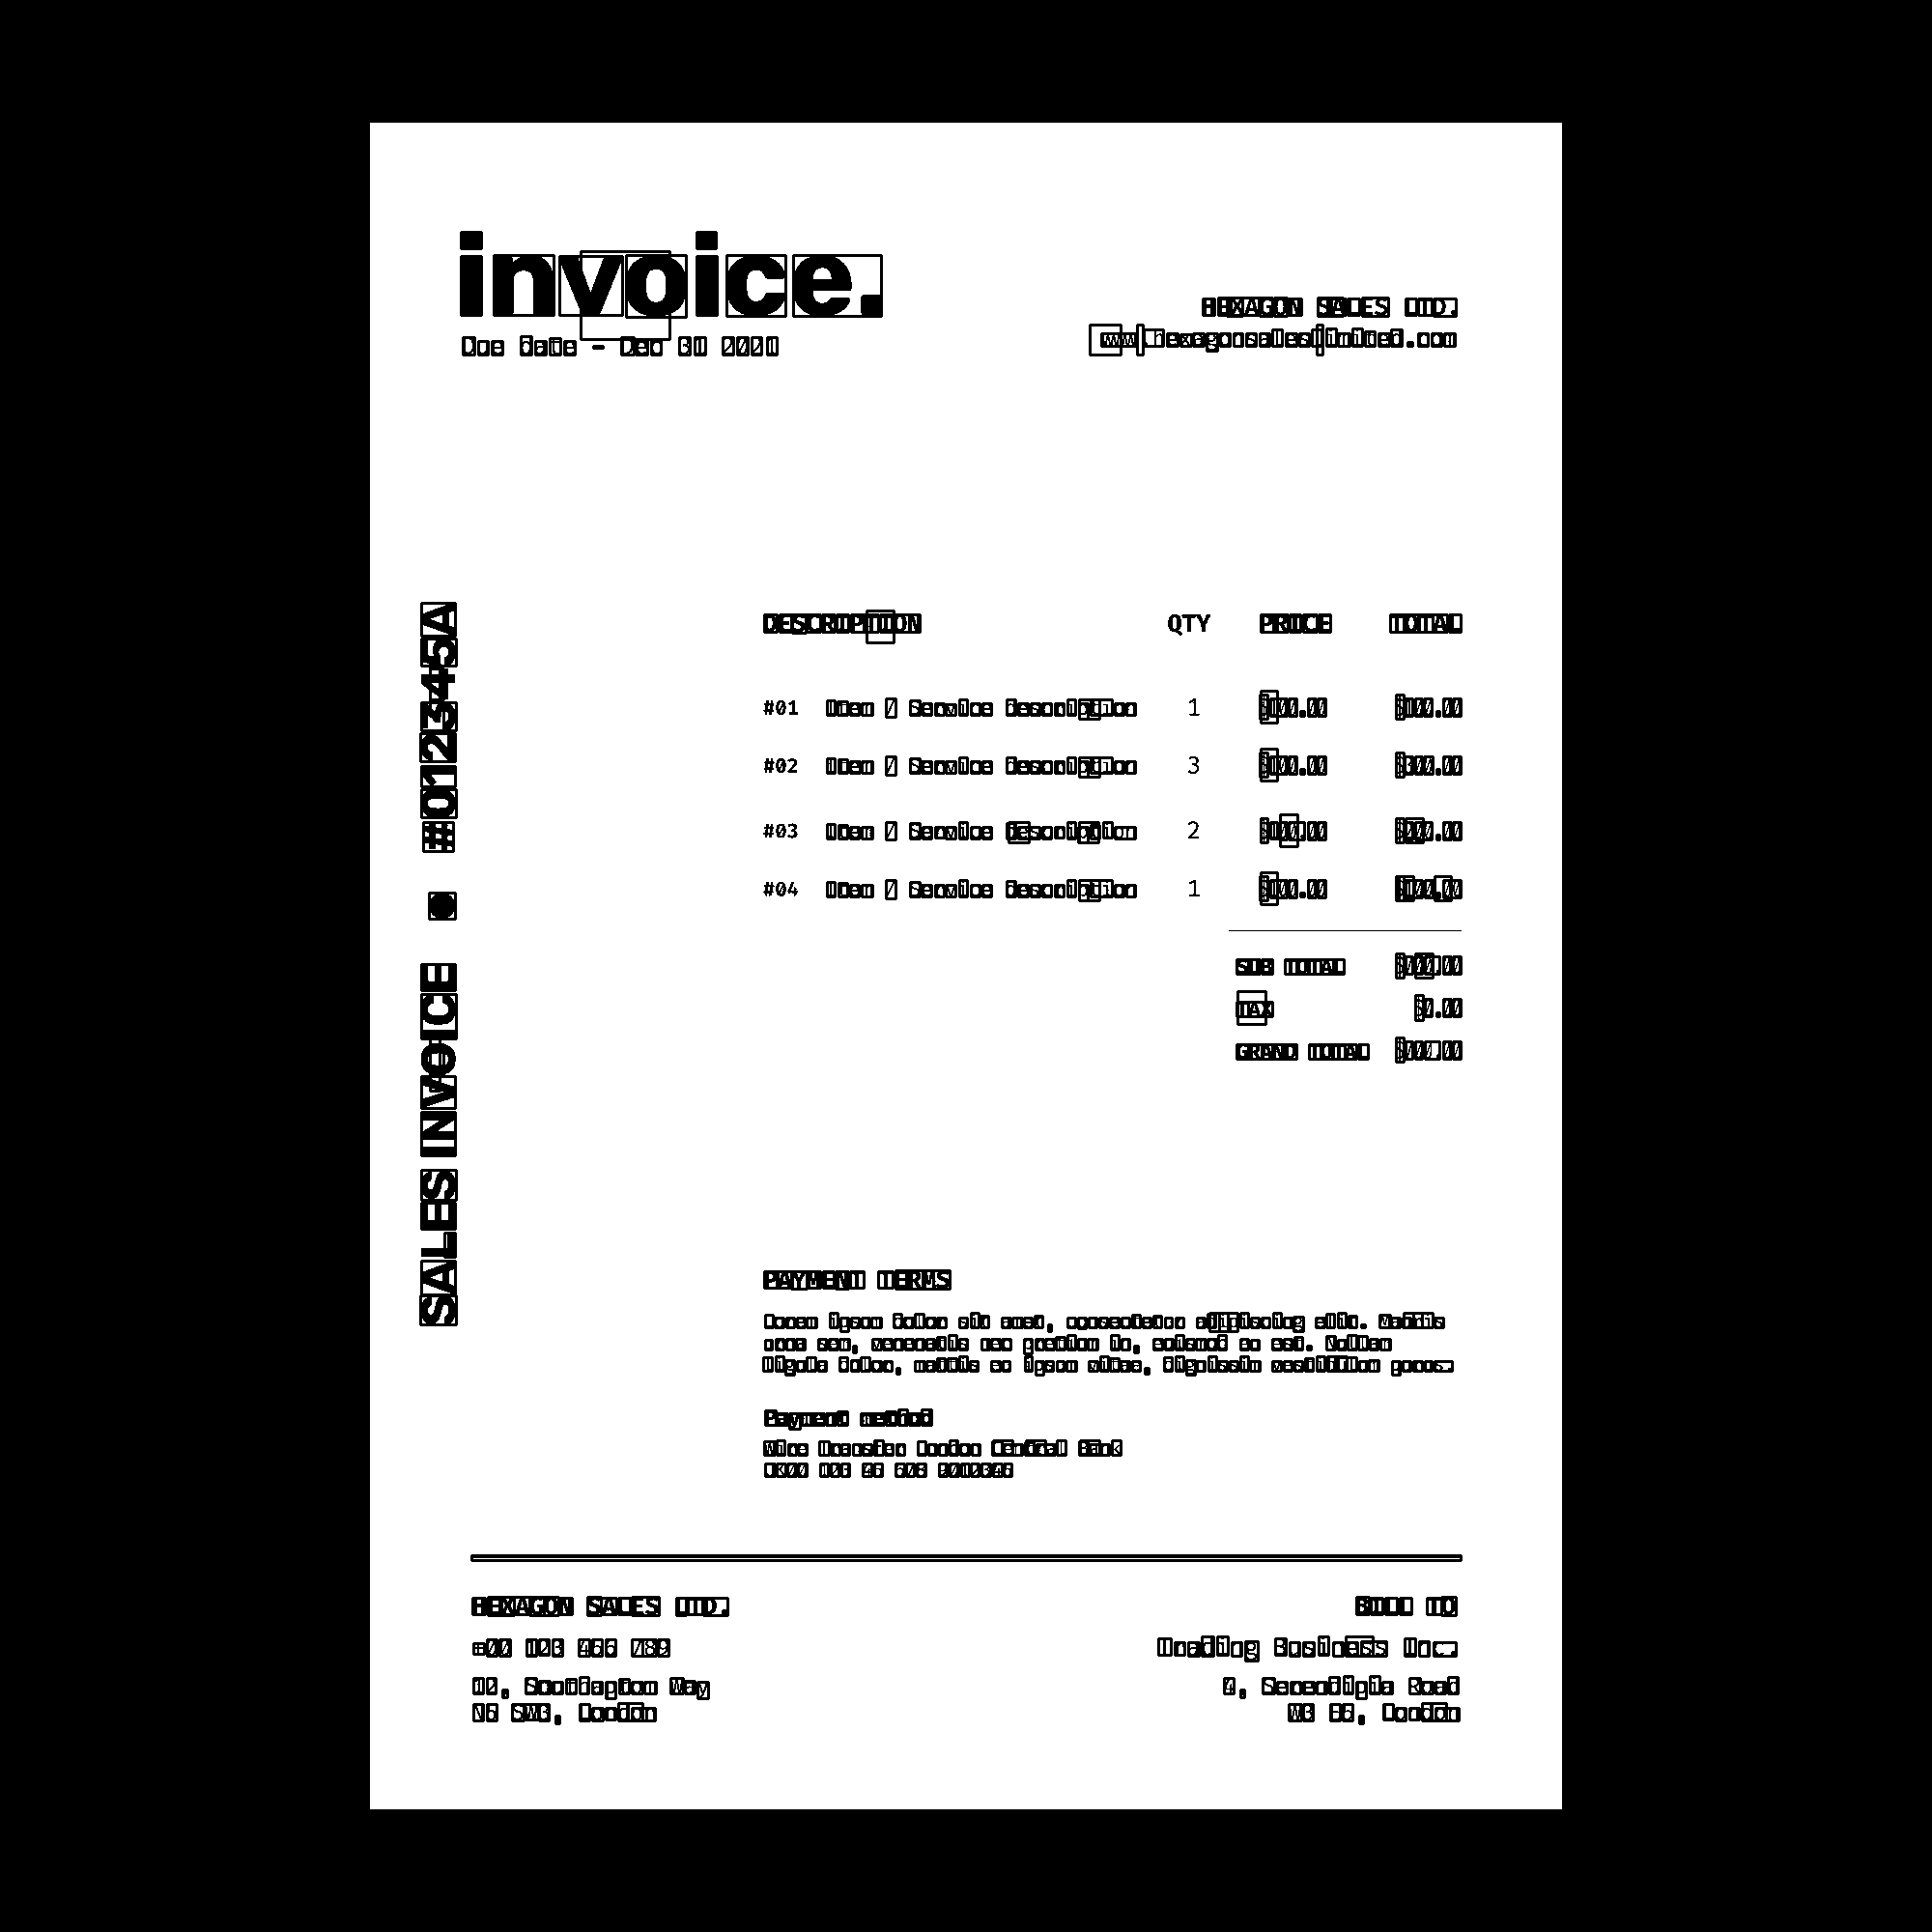

In [74]:
img = binary
# Adding custom options
custom_config = r'--oem 3 --psm 3'
text = pytesseract.image_to_string(img, config=custom_config)
lines = text.splitlines()
for line in lines:
       print(line)
# Draw bounding boxes around detected text areas
h, w = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
cv2_imshow(img)

 

 

SALES INWOICE oO BOI2ZEa5A

 

INVOICE. ert

Que date - Dec 31 2622 erm Mer CAROLE TAD prc

  

 

OESCRLPTLON Qy = PRUCE TOTAL
(oy cae MT Ta RRR rene AS ERC ay L SO RCA) SIRE)
on) ae Me Ta RRA aeerey i] Sime) acme)
803 [cen / Service description wy TRO mCE) Swcmcn
Co RE Kee Te ee MC sao 5 STO mCH) Syme

SUB TOTAL Sem
aire by
ca OMT Onn YICR

PATIENT TERS

     
 

ine ne
ligula deler,

   

set oles iol eae tm Fe
Caymene mecha

laa
Lee}

a aaa

      

 

 

HEXAGON SALES LTD. BILL TO
Cem merc) ier (nana Bets Nao

12, Southapton Way Comer Road
me ce rm ORO i Scher OOOO

 

 

 



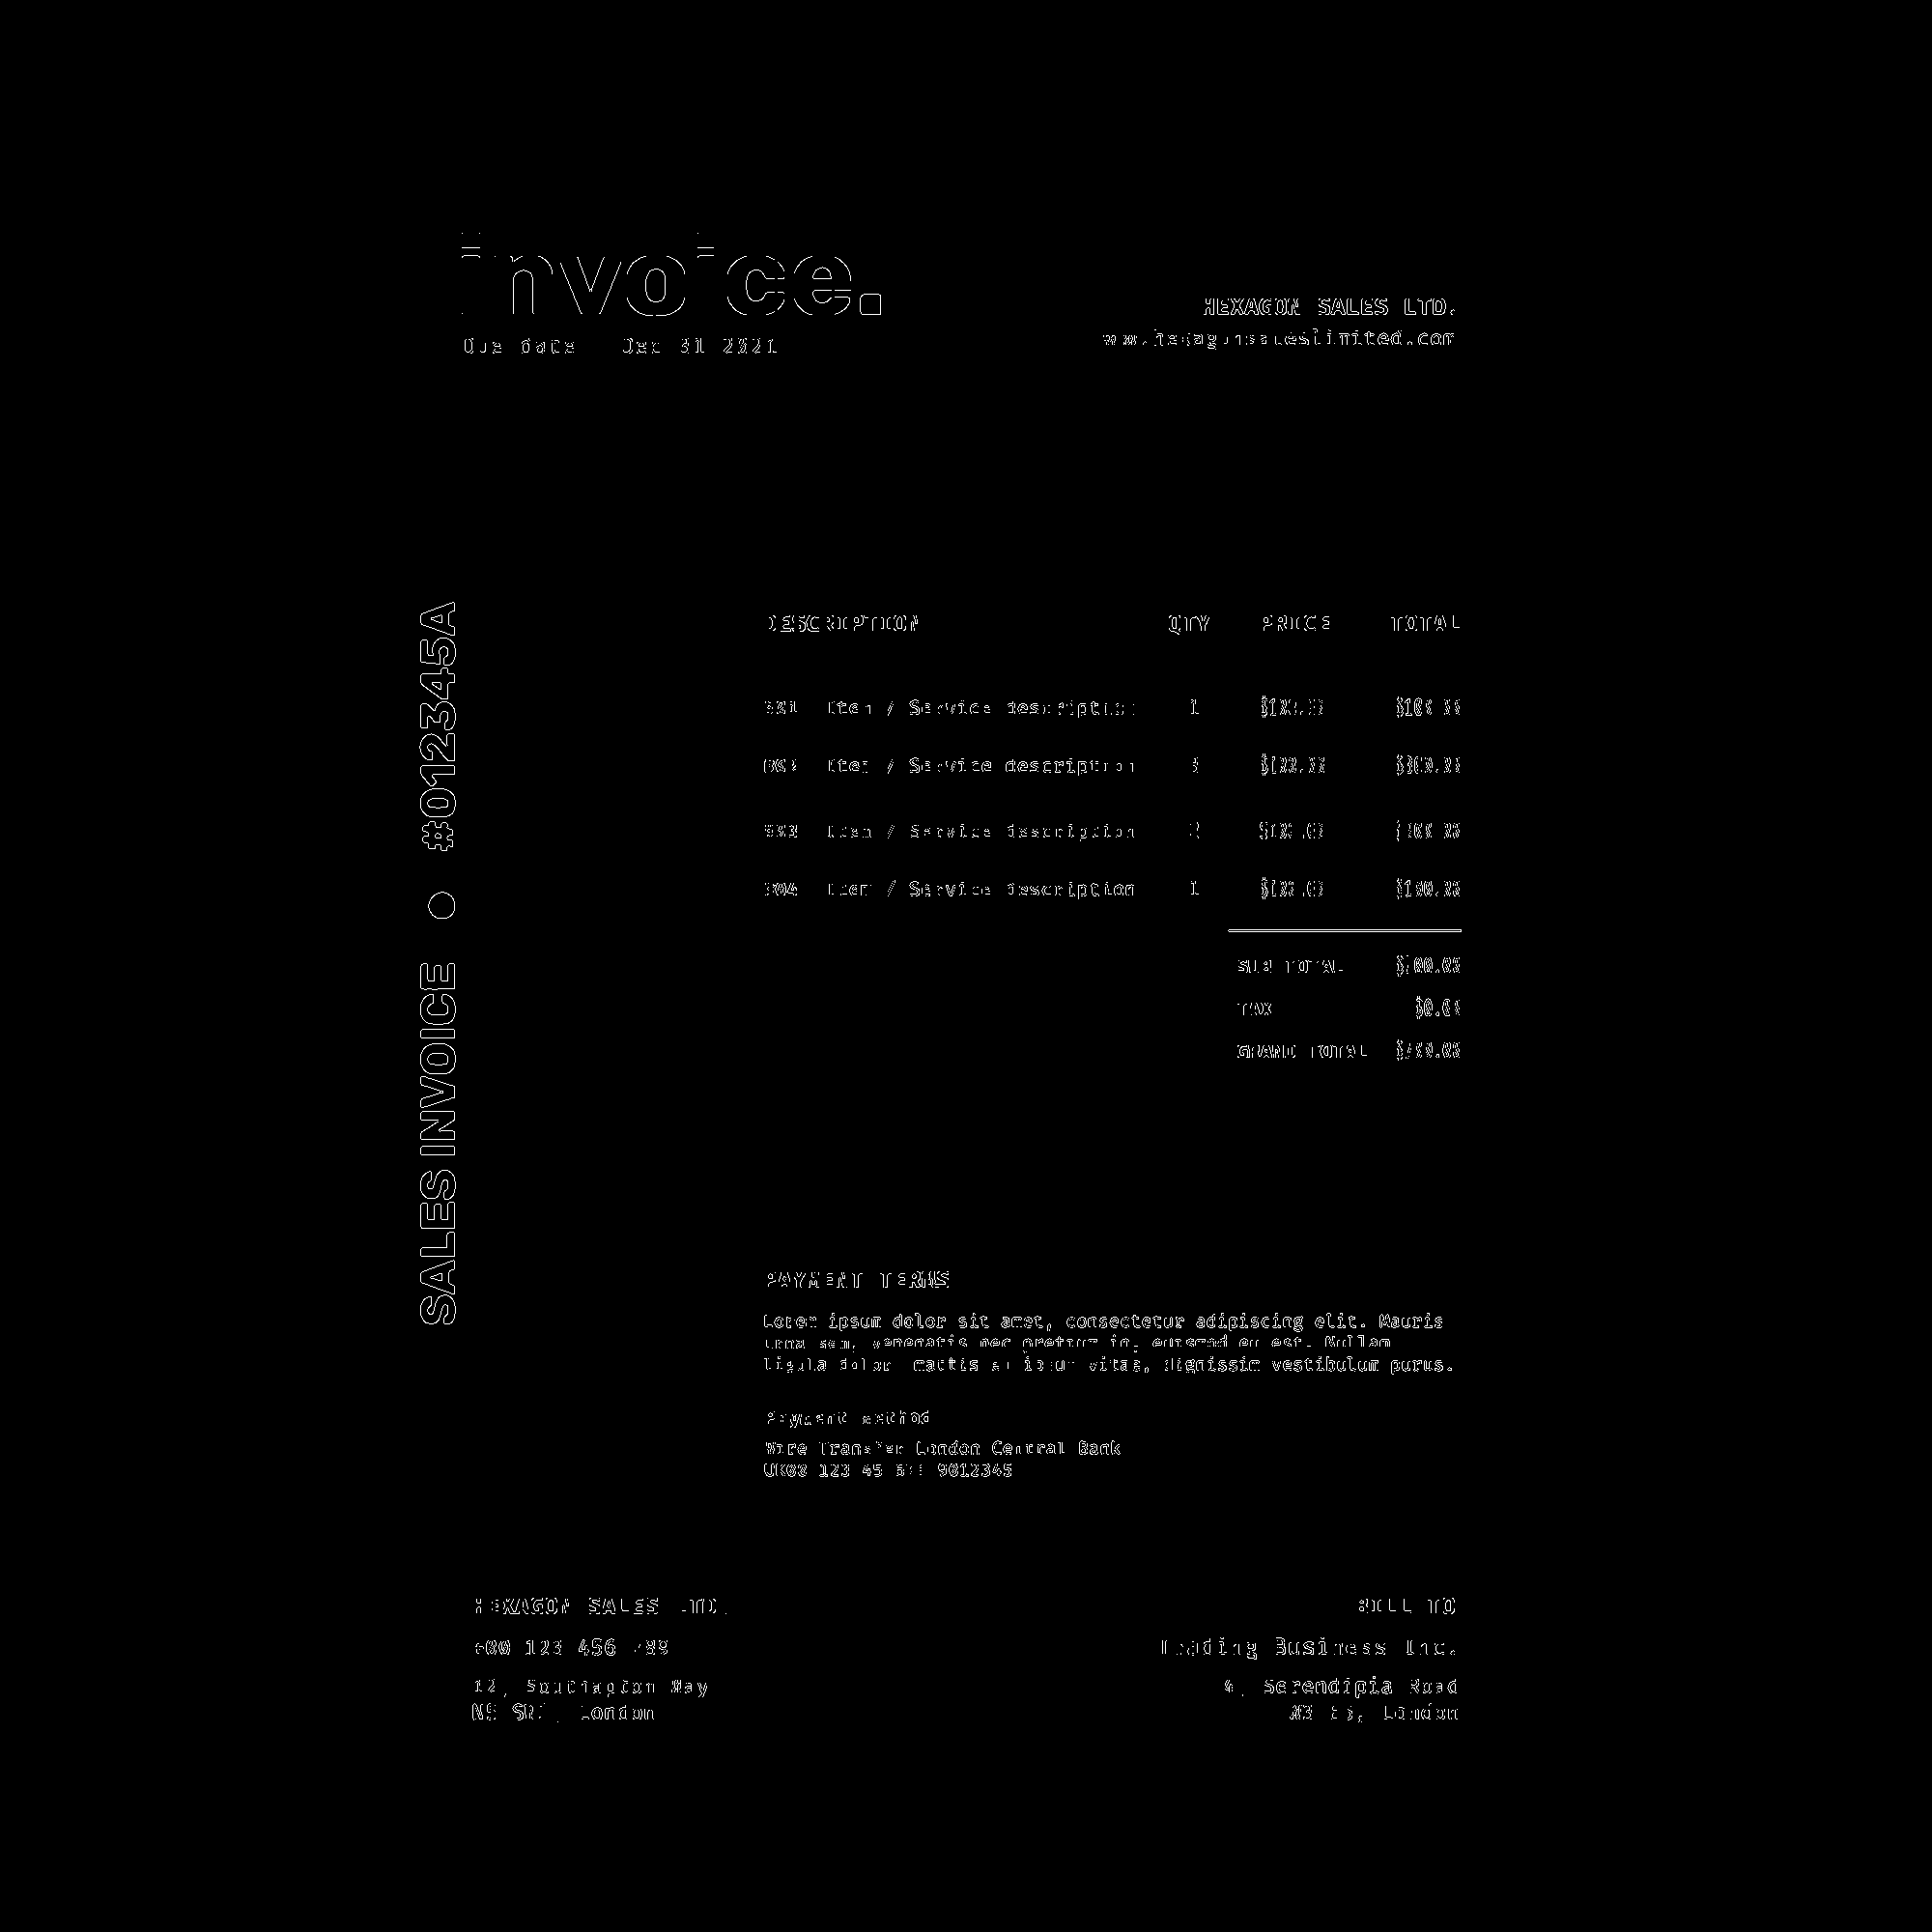

In [75]:
img = edges
# Adding custom options
custom_config = r'--oem 3 --psm 3'
text = pytesseract.image_to_string(img, config=custom_config)
lines = text.splitlines()
for line in lines:
       print(line)
# Draw bounding boxes around detected text areas
h, w = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
cv2_imshow(img)

custom_config = r'--oem 3 --psm 6': This line defines a string custom_config, which is used to set some options of Tesseract OCR.

**OCR Engine Mode (OEM):** The oem parameter specifies the OCR engine mode. Tesseract has four different OCR engine modes

0: Use the traditional Tesseract OCR engine.

1: Use the LSTM (Long Short-Term Memory) based OCR engine.

2: Use a combination of the traditional Tesseract OCR engine and the LSTM engine.

3: Default mode, automatically select the most suitable engine.

**Page Segmentation Mode (PSM)**: The psm parameter specifies the page segmentation mode. Tesseract has multiple page segmentation modes.

0: Orientation and script detection (OSD) only.

1: Automatic page segmentation with OSD.

2: Automatic page segmentation, but no OSD, or OCR.

3: Fully automatic page segmentation, but no OSD. (Default)

4: Assume a single column of text of variable sizes.

5: Assume a single uniform block of vertically aligned text.

6: Assume a single uniform block of text.

7: Treat the image as a single text line.

8: Treat the image as a single word.

9: Treat the image as a single word in a circle.

10: Treat the image as a single character.

11: Sparse text. Find as much text as possible in no particular order.

12: Sparse text with OSD.

13: Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.


**pytesseract.image_to_string(img, config=custom_config):**

This line uses the image_to_string function of the pytesseract library to extract text from the image img.

img: This is the image passed to the image_to_string function, which is the grayscale image defined earlier.

**config=custom_config:** This is the custom configuration string passed to Tesseract, which contains settings for the OCR engine mode and page segmentation mode.

text = pytesseract.image_to_string(img, config=custom_config)

lines = text.splitlines()

for line in lines:
       print(line)

**Store the extracted text in a string list, and then use splitlines to split it into lines and output them line by line**